In [11]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from Bio.Seq import Seq

#### Leer un genoma desde un archivo FASTA

In [2]:
def read_fasta(archivo):
    genoma = ""
    with open(archivo, "r") as f:
        for linea in f:
            if not linea.startswith(">"):
                genoma += linea.rstrip()
    return genoma

dna=read_fasta("dna2.fasta")
print(f"Primeros 100 caracteres de la secuencia de ADN:{dna[:100]}")
print(f"\nLongitud total de la secuencia de ADN:{len(dna)}")


Primeros 100 caracteres de la secuencia de ADN:CTCGCGTTGCAGGCCGGCGTGTCGCGCAACGACGTGTGGGGCCTGACGGGCAGGGAGGATCTCGGCGGCGCCAACTATGCGGTCTTTCGGCTCGAAAGCC

Longitud total de la secuencia de ADN:45743


#### Implementación del algoritmo ingenuo de coincidencia exacta

In [25]:
def naive (p, t):
    coincidencias=[]
    for i in range (len(t)- len(p) +1):
        match= True
        for j in range(len(p)):
            if not t[i+j] == p[j]:
                match=False
                break
        if match:
                coincidencias.append(i)
    return(coincidencias)


p="AC"
t="ACTGTACGTTAGACTAGATCAGATCAGATCAGACA"
print(f"Encontramos '{p}' en '{t}' en las posiciones {naive(p,t)}")

Encontramos 'AC' en 'ACTGTACGTTAGACTAGATCAGATCAGATCAGACA' en las posiciones [0, 5, 12, 32]


#### Modificar el algoritmo para permitir errores

In [50]:
def naive_error(p, t, max_error):
    coincidencias = []
    for i in range(len(t) - len(p) + 1):
        error = 0
        for j in range(len(p)):
            if t[i + j] != p[j]:
                error += 1
                if error > max_error:
                    break
        if error <= max_error:
            coincidencias.append(i)
            print(f"Coincidencia en posición {i}: {t[i:i+len(p)]} (errores = {error})")
    return coincidencias

pa = "ACGGG"
te = "TCGACGTACGATACGCGGACGGGTACGATCATGCATG"
naive_error(pa, te, 1)
    

Coincidencia en posición 12: ACGCG (errores = 1)
Coincidencia en posición 18: ACGGG (errores = 0)


[12, 18]

#### Contar bases de un genoma

In [15]:
def contar_base(s1):
    return {"A": s1.count("A"),
            "T":s1.count("T"),
            "C":s1.count("C"),
            "G":s1.count("G")}

contar_base(dna)

{'A': 7694, 'T': 7694, 'C': 15194, 'G': 15161}

#### Prefijo común más largo

In [17]:
def comun (s1,s2,s3):
    i=0
    while i <len(s1) and i<len(s2) and i<len(s3) and s1[i]==s2[i]==s3[i]:
        i+=1
    return s1[:i]
comun("ATCGD", "ATDTA","ATAT")

'AT'

#### Verificar si una cadena es subcadena de otra

In [19]:
def subcadena(s1, s2):
    if s2 in s1:
        print(f"La cadena '{s2}' se encuentra dentro de la cadena '{s1}'")
    else:
        print(f"La cadena '{s2}' no se encuentra dentro de la cadena '{s1}'")

subcadena("ATCCCGTATA", "CCCG")

La cadena 'CCCG' se encuentra dentro de la cadena 'ATCCCGTATA'


#### Obtener el complemento inverso de una cadena de ADN

In [21]:
def inverso(s1):
    dic={"A":"T","T":"A", "C":"G","G":"C"}
    sec=""
    for i in s1:
        sec=dic[i]+ sec
    return sec

inverso("AAAATTTTCCCGGGG")

'CCCCGGGAAAATTTT'

*También podemos usar Biopython pafrom Bio.Seq import Seq*entaria.*

In [23]:
sec = Seq("AAAATTTCCCGGG")

# Obtenemos la cadena complementaria
print(f"La cadena complementaria de nuestra secuencia es: {sec.complement()}")

# Obtenemos la cadena inversa complementaria
print(f"La cadena inversa complementaria de nuestra secuencia es: {sec.reverse_complement()}")



La cadena complementaria de nuestra secuencia es: TTTTAAAGGGCCC
La cadena inversa complementaria de nuestra secuencia es: CCCGGGAAATTTT


### Leer un archivo .fastq

In [4]:
def read_fastq(archivo):
    secuencia = []
    cualidad = []
    with open(archivo) as f:
        while True:
            f.readline() 
            seq = f.readline().strip() 
            f.readline()  
            qual = f.readline().strip()  
            if len(seq) == 0:
                break
            secuencia.append(seq)
            cualidad.append(qual)
    return secuencia, cualidad


secuencia, cualidad=read_fastq("SRR12345678.fastq")
print(secuencia[:5])
print(cualidad[:5])

            

['TACGAGGGGGGCGAGCGTTGTTCGGAATTATTGGGCGTAAAGGGTGCGTAGGCGGTTTGGTAAGTCTTGTGTGAAATCTCCGGGCTCAACTCGGAGTCTGCATGAGAAACTGCCGGGCTTGAGTATGGGAGAGGTGAGTGGAATTCCCGGT', 'CCTGTTTGCTCCCCTAGCTTTCGTGCCTCAGCGTCAGTTATGGTCCAGTGAGCCGCTTTCGCCACAGGTGTTCCTCCCGATATCTACGCATTTCACCGCTACACCGGGAATTCCACTCACCTCTCCCATACTCAAGCCCGGCAGTTTTTTT', 'TACGTAGGGTGCAAGCGTTGTCCGGAATTATTGGGCGTAAAGAGCGTGTAGGCGGCCCGATTAGTCCGCTGTGAAAGTCCAGGGCTCAACCCTGGAATGCCGGTGGATACTGTCGGGCTAGAGTCCGGAAGGGGCGAGTGGAATTCCTGGT', 'CCTGTTTGCTCCCCACGCTTTCGCGTCTCAGCGTCAGTCACGTCCCAGCGAGCTGCCTTCGCCATTGGTGTTCCTCCTGATATCTGCGCATTTCACCGCTACACCAGGAATTCCACTCGCCCCTTCCGGACTCTAGCCCGACAGTAAAAAA', 'GACAGAGGTGCCGAGCGTTAGGCGGAATCACTGGGCTTAAAGCGTGTGTAGGCGGGTCGTTTAGTGTCTTGTGAAATCCCACGGCTTAACCGTGGAACTGCTGGACATACTGGCGATCTTGGGTCACCTAGGGGCAGCCGGAACAAATGGG']
['???????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????', '???????????????????????????????????????????????????????????????????

#### Convertir caracteres ASCII a puntuaciones Phred

In [27]:
def phred33(i):
    return ord(i)-33

print(f"La calidad de la base es de {phred33("?")}")

La calidad de la base es de 30


####  Analizar una cadena de calidad

In [29]:
def cadena_a_puntajes(cadena_calidad):
    return [phred33_a_puntaje(c) for c in cadena_calidad]

#### Crear un histograma de puntajes

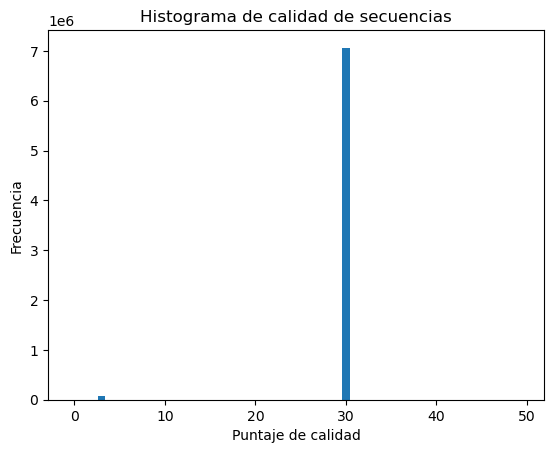

In [55]:
def histograma(calidad):
    histo=[0]*50
    for qual in calidad:
        for i in qual:
            valor= phred33(i)
            histo[valor]+=1
    return histo

def graficar_histograma(histo):
    plt.bar(range(len(histo)),histo)
    plt.ylabel("Frecuencia")
    plt.xlabel("Puntaje de calidad")
    plt.title("Histograma de calidad de secuencias")
    plt.show()


data=histograma(cualidad)
graficar_histograma(data)


###### *Los datos descargados presentan en su mayoria un un Phred score de 30, lo que indica que la probabilidad de error por base es 1 en 1000 (muy buena calidad).*

#### Calcular el contenido GC en cada punto del genoma

In [68]:
def contenido_gc(secuencia):
    read_length=len(secuencia[0])
    gc_counts=[0]*read_length
    total_counts=[0]*read_length

    for read in secuencia:
        for i in range(read_length):
            base= read[i]
            if base =="G" or base=="C":
                gc_counts[i]+=1
            if base in "ATCG":
                total_counts[i]+=1
    gc_fraction=[]
    for i in range(read_length):
        if total_counts[i]>0:
            gc_fraction.append(gc_counts[i]/float(total_counts[i]))
        else:
            gc_fraction.append(0)
    return gc_fraction


gc_valores=contenido_gc(secuencia)

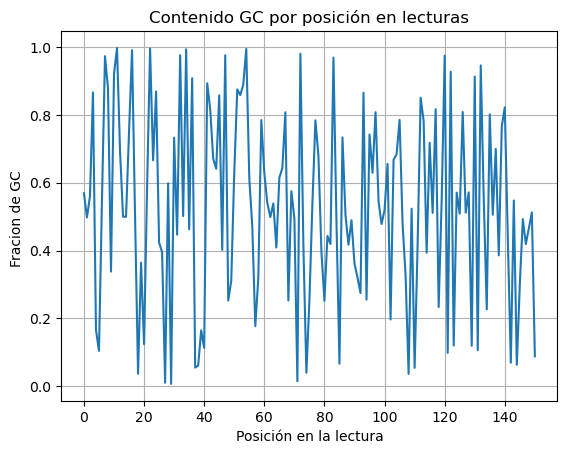

In [72]:
plt.plot(range(len(gc_valores)),gc_valores)
plt.ylabel("Fracion de GC ")
plt.xlabel("Posición en la lectura")
plt.title("Contenido GC por posición en lecturas")
plt.grid(True)
plt.show()
